In [1]:
import os
import face_recognition
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Step1. 사진 모으기
데이터는 영빈님이 제공한 남자 연예인 사진을 기초로 작업하였다.

In [2]:
#파일 경로 지정
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['기성용.jpg', '이동휘.jpg', '리암 니슨.png', '브래들리 쿠퍼.jpg', '조원희.jpg', '황병국.jpg', '배성우.png', '제프리 힌턴.jpg', '박해일.jpeg', '사무엘 L 잭슨.jpg', '조승우.jpeg', '이대형.jpg', '박건우.png', '박찬호.jpg', '박항서.jpg', '이승철.jpeg', '톰 홀랜드.jpg', '지드래곤.jpeg', '유재석.jpg', '매드클라운.jpeg', '개리.jpg', '박휘순.jpg', '잭 니콜슨.jpg', '슈가.jpg', '정민철.jpg', '야마다 타카유키.jpeg', '이범수.jpeg', '주호민.jpg', 'jinpyo1.jpg', '이안 굿펠로우.jpg', '개코.jpg', '조정석.jpg', '이희준.jpg', '고창석.jpeg', '박희순.jpg', '마크 러팔로.jpg', '유희열.jpeg', '존 파브르.jpg', '조달환.png', '유해진.jpg', '꽈두룹.jpeg', '잭 스페이더.jpg', '김민재.jpeg', '최양락.jpg', '윤도현.png', '슬리피.jpg', '하현우.jpg', '홍구.jpg', '케빈 스페이시.jpg', '이용진.jpg', '손호준.jpeg', '심수창.jpg', '하승진.jpg', '이종석.jpeg', '윤균상.jpg', '이성민.jpg', '철면수심.jpg', '윤종신.jpeg', '정우성.jpeg', '김경진.png', '오재원.jpg', '최민식.jpg', '목진화.png', '클린트 이스트우드.jpg', '김C.jpeg', '스윙스.jpeg', '박서준.jpeg', '한석규.jpg', '티모시 달튼.jpeg', '최무성.jpg', '박명수.jpg', '숀 코네리.jpg', '이천수.jpg', '정국.jpg', '최현석.jpg', '방시혁.jpeg', 'trump.jpg', '장성호.jpeg', '옥냥이.jpeg', '박신양.png', '진.jpg', '박정민.jpg', '정형돈.jpg', '

## Step2. 얼굴 영역 자르기

In [3]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

In [4]:
# #잘라낸 얼굴 확인
# from PIL import Image
# face = get_gropped_face(image_path)
# pillow_image = Image.fromarray(face)
# pillow_image.save(path_to_save)

## Step3. 얼굴 영역의 임베딩 추출하기

In [5]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [6]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [7]:
#embedding dictionary 만들기

embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['trump']

array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
        0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
        0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
        0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
       -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
       -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
        0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
        0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
       -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
       -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
       -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
       -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
        0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
        0.05921567, -0.06115703, -0.11171092,  0.23917492, -0.15

In [8]:
#유사도 함수
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [9]:
get_distance('jinpyo1', 'jinpyo2')

0.3566462497741984

In [10]:
get_distance('jinpyo1', '로다주')

0.798372026441005

나 자신을 비교했을때 두 사진간의 거리가 매우 가깝다. 반면 다른 사람과는 꽤나 거리가 있다.

In [11]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [12]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('trump',
  array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
          0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
          0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
          0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
         -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
         -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
          0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
          0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
         -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
         -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
         -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
         -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
          0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
          0.05921567, -0.06

In [13]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    name_list = []

    for i in range(top):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            name_list.append(sorted_faces[i][0])
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    for i in name_list:
        path = i + '.jpg'
        image_file = os.path.join(dir_path, path)
        face = get_gropped_face(image_file)
        plt.imshow(face)

In [14]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            path = sorted_faces[i][0] + '.jpg'
            image_file = os.path.join(dir_path, path)
            face = get_gropped_face(image_file)
            plt.subplot(2,2,i)
            plt.imshow(face)

순위 1 : 이름(jinpyo2), 거리(0.3566462497741984)
순위 2 : 이름(최양락), 거리(0.4366469962266742)
순위 3 : 이름(돈스파이크), 거리(0.4541786932754308)
순위 4 : 이름(개코), 거리(0.4669392625773603)


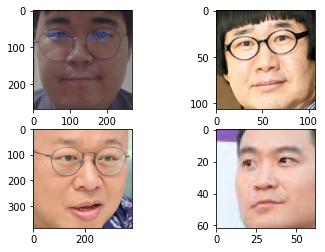

In [15]:
get_nearest_face('jinpyo1')

# 총평
## 데이터 수집
데이터 수집은 이영빈씨가 모은 남자 연예인의 데이터를 기초로 작업하였다.
## 얼굴 영역 자르기
face recognition을 사용하여 사진의 얼굴을 추출하였다.
## 임베딩 추출
임베딩 작업 역시 face recognition에서 제공하는 도구를 사용하여 작업하였다.
## 결과
생각보다 정확히 닮은 꼴을 찾아내는 것을 확인할 수 있었다.